In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,8)

In [2]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score

In [49]:
import tensorflow as tf

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
def processing(pd_df):
    a = pd_df['Class']
    b = pd_df.drop(['Time','Class'],axis = 1)
    return a,b

In [7]:
credit_fraud = pd.read_csv('creditcard.csv') # loading csv dataset into Notebook

In [8]:
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

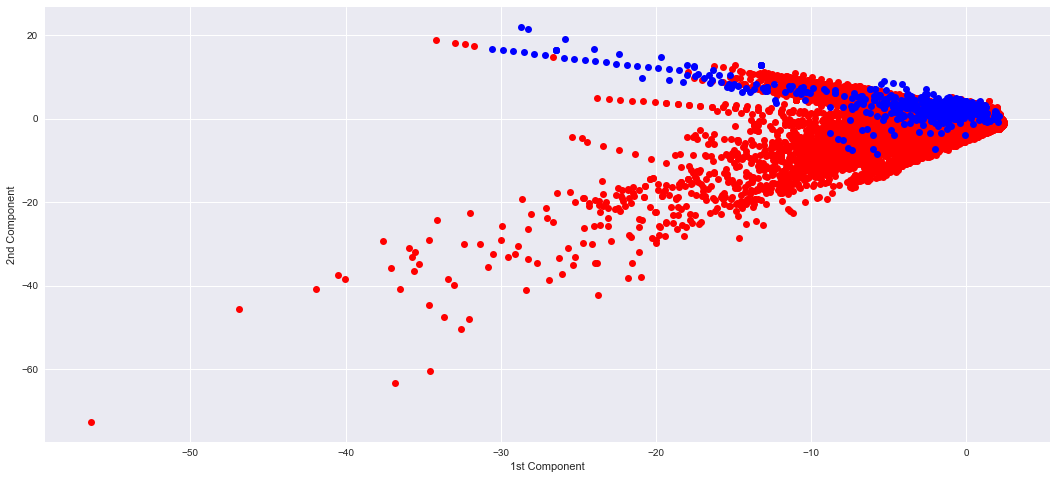

In [10]:
plt.plot(credit_fraud[credit_fraud['Class']==0]['V1'],credit_fraud[credit_fraud['Class']==0]['V2'],'ro')
plt.plot(credit_fraud[credit_fraud['Class']==1]['V1'],credit_fraud[credit_fraud['Class']==1]['V2'],'bo')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')

(array([  2.75992000e+05,   6.01000000e+03,   1.53900000e+03,
          6.27000000e+02,   2.27000000e+02,   1.44000000e+02,
          9.20000000e+01,   6.90000000e+01,   3.30000000e+01,
          2.20000000e+01,   1.00000000e+01,   1.10000000e+01,
          5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

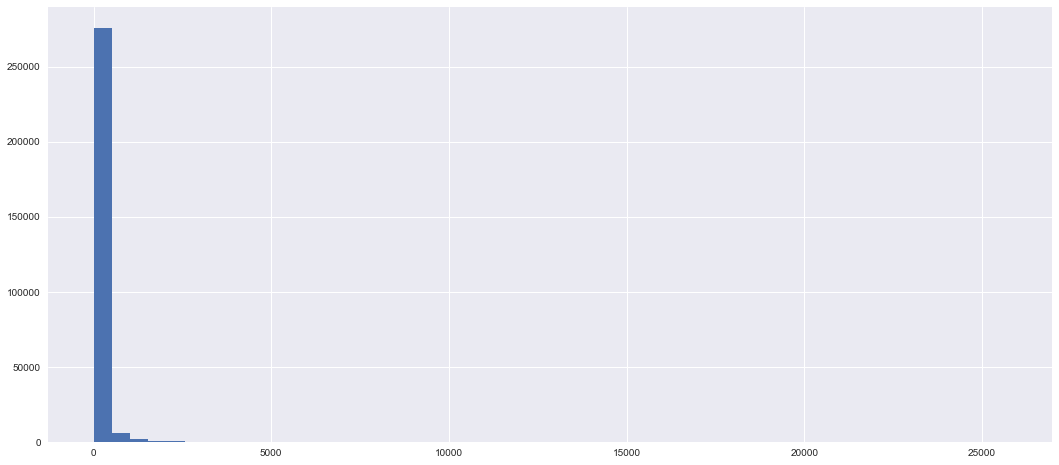

In [11]:
plt.hist(credit_fraud['Amount'], bins=50)# the only known and understandable colunm is Amount, it is extremely skewed.  

In [12]:
target = credit_fraud['Class'] # seperate target from the rest of the data

In [13]:
credit_fraud_analysis = credit_fraud.drop(['Time','Class'],axis = 1)

In [14]:
x = credit_fraud_analysis
y = target

In [15]:
from sklearn.model_selection import train_test_split     #seperate imbalanced dataset into training and testing, !stratify parameter)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                stratify=y, 
                                                test_size=0.30)

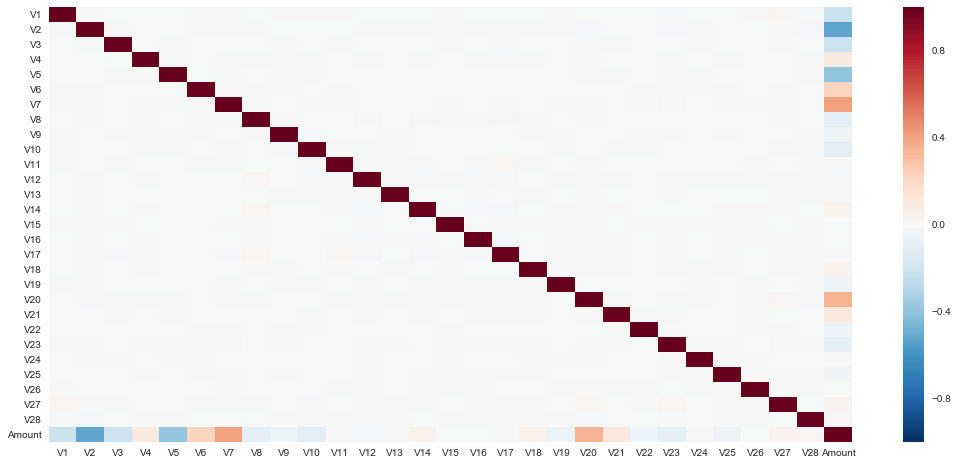

In [16]:
sns.heatmap(X_train.corr())

In [17]:
logit = LogisticRegressionCV(Cs = 10, cv = 10, scoring = 'average_precision')
logit.fit(preprocessing.normalize(X_train), y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='average_precision', solver='lbfgs',
           tol=0.0001, verbose=0)

In [18]:
logit.scores_

{1: array([[ 0.485433  ,  0.48563144,  0.48795976,  0.52296178,  0.61140779,
          0.62263495,  0.60748504,  0.60592441,  0.60626115,  0.60627931],
        [ 0.28737562,  0.28838725,  0.30262024,  0.38632955,  0.57356345,
          0.59965788,  0.60832035,  0.61399694,  0.61679852,  0.61689878],
        [ 0.40309642,  0.40314123,  0.4035404 ,  0.41878242,  0.52298842,
          0.57178529,  0.58815503,  0.58894693,  0.58957379,  0.58972208],
        [ 0.51606822,  0.51614109,  0.52056051,  0.53338348,  0.60444412,
          0.63705385,  0.65585768,  0.66002193,  0.660053  ,  0.66050849],
        [ 0.4756883 ,  0.476979  ,  0.48271768,  0.52295952,  0.60023173,
          0.66537419,  0.68177431,  0.68242699,  0.68372401,  0.68415336],
        [ 0.26939423,  0.27069223,  0.28061636,  0.33364167,  0.52855109,
          0.59831052,  0.6130387 ,  0.61245458,  0.61145754,  0.6072557 ],
        [ 0.40200338,  0.40278466,  0.40460798,  0.4235437 ,  0.54433255,
          0.59765843,  0.6044

In [19]:
a = logit.predict(preprocessing.normalize(X_test))

In [20]:
tn, fp, fn, tp = confusion_matrix(a, y_test).ravel()
(tn, fp, fn, tp)

(85276, 75, 19, 73)

In [43]:
accuracy = (tp + tn)/(tn + fp + fn + tp)
TPR = tp/(tp+fn)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
precision = tp/(tp+fp)

In [22]:
print(accuracy, TPR, FPR, FNR, precision)

0.998899851363 0.79347826087 0.000878724326604 0.20652173913 0.493243243243


In [45]:
forrest = RandomForestClassifier(max_depth = 5, n_estimators = 50)
from sklearn.model_selection import cross_val_score

In [31]:
score = cross_val_score(forrest,preprocessing.normalize(X_train), y_train, cv = 10)

In [46]:
forrest.fit(preprocessing.normalize(X_train), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
result = forrest.predict(preprocessing.normalize(X_test))
confusion_matrix(result, y_test)

array([[85291,    97],
       [    4,    51]])

In [48]:
result = forrest.predict(preprocessing.normalize(X_test))
tn, fp, fn, tp = confusion_matrix(result, y_test).ravel()
print(accuracy, TPR, FPR, FNR, precision)

0.998431703007 0.9375 0.00155688482564 0.0625 0.101351351351


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
credit_fraud_analysis = preprocessing.normalize(credit_fraud_analysis)

In [24]:
credit_fraud_analysis = pd.DataFrame(credit_fraud_analysis)

In [25]:
credit_fraud_analysis.columns = credit_fraud.columns[1:30]

In [26]:
credit_fraud_analysis.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.009085,-0.000486,0.016946,0.009208,-0.002260,0.003089,0.001601,0.000659,0.002431,0.000607,...,0.001680,-0.000122,0.001856,-0.000738,0.000447,0.000859,-0.001264,0.000892,-0.000141,0.999658
1,0.314200,0.070163,0.043888,0.118143,0.015822,-0.021712,-0.020774,0.022435,-0.067336,-0.044018,...,-0.018212,-0.059519,-0.168368,0.026702,-0.089591,0.044070,0.033189,-0.002368,0.003882,0.709144
2,-0.003587,-0.003539,0.004682,0.001003,-0.001329,0.004754,0.002090,0.000654,-0.004000,0.000548,...,0.001386,0.000655,0.002038,0.002401,-0.001820,-0.000865,-0.000367,-0.000146,-0.000158,0.999871
3,-0.007819,-0.001499,0.014509,-0.006986,-0.000083,0.010093,0.001923,0.003054,-0.011224,-0.000445,...,-0.001684,-0.000876,0.000043,-0.001540,-0.009513,0.005239,-0.001796,0.000508,0.000497,0.999399
4,-0.016527,0.012525,0.022099,0.005751,-0.005810,0.001369,0.008461,-0.003860,0.011669,0.010746,...,0.005830,-0.000135,0.011391,-0.001961,0.002016,-0.002940,0.007167,0.003131,0.003070,0.998705


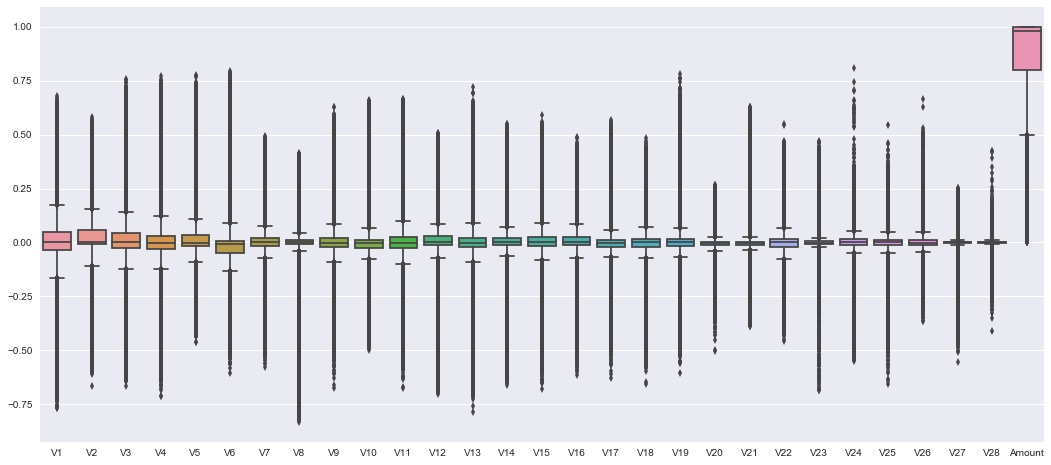

In [27]:
sns.boxplot(data = credit_fraud_analysis)

In [51]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[29])]

In [52]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                          hidden_units=[10, 20, 10],
                                          n_classes=2,
                                          model_dir="/tmp/credit_fraud")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/credit_fraud', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [53]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(X_train)},
      y=np.array(y_train),
      num_epochs=None,
      shuffle=True)

In [63]:
classifier.train(input_fn=train_input_fn, steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/credit_fraud\model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into /tmp/credit_fraud\model.ckpt.
INFO:tensorflow:loss = 0.0359696, step = 5001
INFO:tensorflow:global_step/sec: 253.111
INFO:tensorflow:loss = 0.0962254, step = 5101 (0.399 sec)
INFO:tensorflow:global_step/sec: 273.945
INFO:tensorflow:loss = 0.0188835, step = 5201 (0.365 sec)
INFO:tensorflow:global_step/sec: 266.781
INFO:tensorflow:loss = 0.0187277, step = 5301 (0.374 sec)
INFO:tensorflow:global_step/sec: 261.608
INFO:tensorflow:loss = 0.0205327, step = 5401 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.981
INFO:tensorflow:loss = 0.0163411, step = 5501 (0.379 sec)
INFO:tensorflow:global_step/sec: 268.64
INFO:tensorflow:loss = 0.0530356, step = 5601 (0.371 sec)
INFO:tensorflow:global_step/sec: 270.825
INFO:tensorflow:loss = 4.64032, step = 5701 (0.369 sec)
INFO:tensorflow:global_step/sec: 276.641
INFO:tensorflow:loss = 0

In [55]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(X_test)},
      y=np.array(y_test),
      num_epochs=1,
      shuffle=False)

In [64]:
accuracy_score = classifier.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Starting evaluation at 2017-10-16-02:18:36
INFO:tensorflow:Restoring parameters from /tmp/credit_fraud\model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2017-10-16-02:18:43
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.999356, accuracy_baseline = 0.998268, auc = 0.928582, auc_precision_recall = 0.823288, average_loss = 0.00317883, global_step = 10000, label/mean = 0.00173215, loss = 0.4066, prediction/mean = 0.00172678


In [66]:
predictions = list(classifier.predict(input_fn=test_input_fn))
predicted_classes = [p["classes"] for p in predictions]

INFO:tensorflow:Restoring parameters from /tmp/credit_fraud\model.ckpt-10000


In [70]:
result = pd.DataFrame(predicted_classes)
c = result[0].apply(lambda x: int(x))

In [71]:
np.sum(c)

147

In [72]:
np.sum(y_test)

148